In [1]:
#Packages.
from scipy.integrate import odeint      #ODE calculations for SIR

#Modules.
import Functions as fun

%matplotlib inline
%pylab inline

#Plot settings.
rc('font', size = 18)
rc('lines', linewidth = 2)

myColors = plt.cm.Spectral(concatenate([arange(0,0.35,1/12.),arange(0.6,1.05,1/12.)]))

Populating the interactive namespace from numpy and matplotlib


In [2]:
Years = range(0,20)
stepsSeason = 1000

timeAxis = range(len(Years)*stepsSeason)

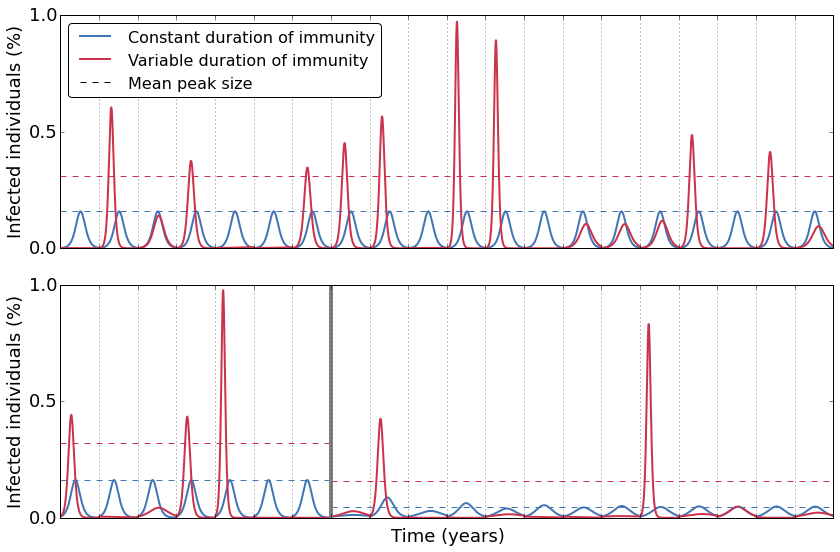

In [5]:
#Plotting timeseries, with average peak incidence values.
fig = figure(figsize=(12,8))
axes = [fig.add_subplot(211),fig.add_subplot(212)]


#-----------------------------------------------------------------------------
#Plot without vaccination.
ax = axes[0]

#Read data.
peakDeterministic = fun.readData('data/TimeseriesPeakDeterministic')
peakStochastic = fun.readData('data/TimeseriesPeakStochastic')
infectedsDeterministic = fun.readData('data/TimeseriesDeterministic')
infectedsStochastic = fun.readData('data/TimeseriesStochastic')

#Plot timeseries
ax.plot(timeAxis,infectedsDeterministic, color=myColors[9], label = 'Constant duration of immunity')
ax.plot(timeAxis,infectedsStochastic, color=myColors[1], label = 'Variable duration of immunity')


#Plot peak values. Deterministic.
ax.plot([timeAxis[0],timeAxis[-1]],[peakDeterministic,peakDeterministic],'--',lw=1,color=myColors[9])

#Plot peak values. Stochastic.
ax.plot([timeAxis[0],timeAxis[-1]],[mean(peakStochastic),mean(peakStochastic)],
         '--',lw=1,color=myColors[1],zorder=2)

#Dummy plot for legend.
myPlot = ax.plot([0,1],[-1,-1],'--',lw=1, color = 'black', label = 'Mean peak size')
ax.legend(fontsize = 16, fancybox = True, loc = 2,
         framealpha = 1, handlelength = 2.5)



#-----------------------------------------------------------------------------
#Plot with vaccination.
ax = axes[1]

#Read data.
peakDeterministicPre = fun.readData('data/TimeseriesPeakDeterministicPre')
peakStochasticPre = fun.readData('data/TimeseriesPeakStochasticPre')

peakDeterministicPost = fun.readData('data/TimeseriesPeakDeterministicPost')
peakStochasticPost = fun.readData('data/TimeseriesPeakStochasticPost')

infectedsDeterministic = fun.readData('data/TimeseriesDeterministicVaccination')
infectedsStochastic = fun.readData('data/TimeseriesStochasticVaccination')

#Plot timeseries.
ax.plot(timeAxis,infectedsDeterministic, color=myColors[9])
ax.plot(timeAxis,infectedsStochastic, color=myColors[1])

#Plot peak values. Deterministic.
ax.plot([timeAxis[0],timeAxis[7000]],[peakDeterministicPre,peakDeterministicPre],'--',lw=1,color=myColors[9])
ax.plot([timeAxis[7000],timeAxis[-1]],[peakDeterministicPost,peakDeterministicPost],'--',lw=1,color=myColors[9])

#Plot peak values. Stochastic.
ax.plot([timeAxis[0],timeAxis[7000]],[mean(peakStochasticPre),mean(peakStochasticPre)],
         '--',lw=1,color=myColors[1],zorder=2)
ax.plot([timeAxis[7000],timeAxis[-1]],[mean(peakStochasticPost),mean(peakStochasticPost)],
         '--',lw=1,color=myColors[1],zorder=2)

#Plot introduction of vaccination bar.
ax.plot([7*stepsSeason,7*stepsSeason],[0,0.01], color = 'gray', lw = 4)
ax.set_xlabel('Time (years)')


for ax in axes:
    ax.set_xticklabels([])
    ax.set_xticks(range(0,len(Years)*stepsSeason,stepsSeason))

    ax.set_ylabel('Infected individuals (%)')
    ax.set_ylim(0,0.01)
    ax.set_yticks([0,0.005,0.01])
    ax.set_yticklabels(['0.0','0.5','1.0'])

    ax.xaxis.grid(True)

tight_layout()

#Save figure.
if True:
    fig.savefig('figures/timeseries.eps')
    fig.savefig('figures/timeseries.png')